# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [89]:
#Loading the data
dataset = pd.read_csv('Fraud.csv')
dataset.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [90]:
dataset.shape

(6362620, 11)

# EDA:

In [91]:
#Assigning Dependent and Independent variables

x = dataset.drop('isFraud',axis=1)
y = dataset['isFraud']

# IMBALANCE DATASET

In [92]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

The proportion of class in the target variable are not uniform i.e Imbalance dataset. We can treat the imbalance datasets by using the sampling techniques (Undersampling,Oversampling)

# CONVERTED IMBALANCED TO BALANCE DATA

In [93]:
#Imbalanced dataset, So fixing it by using sampling techniques

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='majority')
X,Y = under_sampler.fit_resample(x,y)

In [113]:
X.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,162,PAYMENT,1266.04,C660448549,0.0,0.0,M1341189829,0.0,0.00,0
1,349,CASH_OUT,209956.28,C14216437,19989.0,0.0,C1509047687,0.0,209956.28,0


In [114]:
Y.shape

(16426,)

In [97]:
Y.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [131]:
# Droping the unrelated variables
data = X.drop(['nameOrig','nameDest'],axis=1)

In [132]:
data.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,162,PAYMENT,1266.04,0.0,0.0,0.0,0.00,0
1,349,CASH_OUT,209956.28,19989.0,0.0,0.0,209956.28,0


In [133]:
data.shape

(16426, 8)

In [134]:
# Variable 'Type' is in categorical, Converting into numerical by using lable encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type']).astype('int')
data.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,162,3,1266.04,0.0,0.0,0.0,0.00,0
1,349,1,209956.28,19989.0,0.0,0.0,209956.28,0


# 1 DATA CLEANING: MISSING VALUES, OUTLIERS, MULTICOLINEARITY

# MISSING VALUES:

In [135]:
data.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
dtype: int64

# OUTLIERS:

OUTLIERS CAN BE DETECT BY USING 3 METHODS
1 Z SCORE
2 IQR METHOD
3 BOXPLOT

NOTE: AMONG ALL IQR IS THE BEST METHOD TO FINDOUT THE OUTLIERS IN THE DATASET.

In [136]:
columns = ['amount','oldbalanceOrg','oldbalanceDest','newbalanceDest']
for column in columns:
    outliers_column = []
    def outlier_iqr(sample):
        sorted_data = sorted(sample)
        q1 = np.percentile(sorted_data,25)
        q3 = np.percentile(sorted_data,75)
        IQR = q3 - q1
        lower_bound = q1-(1.5*IQR)
        upper_bound = q3+(1.5*IQR)
        print("Detecting outliers in {}".format(column));print()
        print("Lower bound :",lower_bound);print("Upper bound :",upper_bound);print()
        for i in sorted_data:
            if (i<lower_bound or i>upper_bound):
                outliers_column.append(i)
        return outliers_column
    sample_outliers = outlier_iqr(data[column])
    print("Outliers using IQR Method in {} :\n".format(column),sample_outliers);print()
    print()

Detecting outliers in amount

Lower bound : -719049.5925
Upper bound : 1297133.4275000002

Outliers using IQR Method in amount :
 [1298609.73, 1298609.73, 1298920.78, 1298920.78, 1299860.86, 1299860.86, 1300775.5, 1301090.39, 1301090.39, 1301410.68, 1301410.68, 1302202.26, 1302249.92, 1303029.52, 1303029.52, 1303543.6, 1303543.6, 1305754.09, 1305754.09, 1306690.61, 1306690.61, 1307156.17, 1307156.17, 1309602.55, 1309602.55, 1309940.05, 1309940.05, 1311150.9, 1311150.9, 1312406.14, 1312406.14, 1312694.5, 1312694.5, 1312947.27, 1312947.27, 1314660.84, 1314660.84, 1314897.11, 1314897.11, 1315413.21, 1318024.48, 1318024.48, 1318693.62, 1319703.76, 1319703.76, 1320807.93, 1321091.25, 1321091.25, 1321984.45, 1321984.45, 1322277.84, 1322277.84, 1323909.85, 1323909.85, 1330802.24, 1330802.24, 1333358.33, 1334484.71, 1334919.42, 1334919.42, 1335959.76, 1335959.76, 1336901.11, 1336901.11, 1338487.47, 1338487.47, 1340263.67, 1340263.67, 1343002.08, 1346264.61, 1346264.61, 1347123.21, 1348095.12, 

NOTE:
Removing the outliers is not a good work because the model doesnt learn the patterns of the outliers and it may cause the overfitting for future transactions. 
So sometimes good to keep the some acceptable outliers in the data and check the impact of it (Accuracy of the model ). If the model is giving worse results then work on outliers and build the model. 
Here I am not going to handle the outliers. Just building the model with outliers and seeing the results.

Treating the outliers : We can handle the outliers by using the 3 methods
1 Removing the outliers 2 Quantile based flooring and capping 3 Replacing with mean/median.

# MULTICOLINEARITY:

Multicolinearity is the occurence of high intercorrelation among two or more independent variables.

In [144]:
corr_data = data.copy()
corr_data['isFraud'] = Y

<AxesSubplot:>

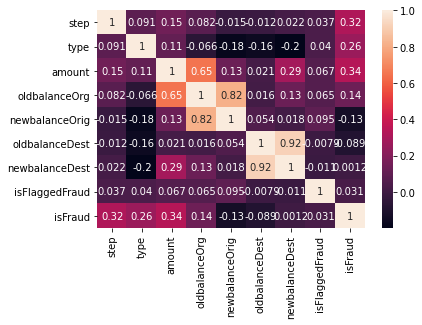

In [147]:
#Multicolinearity
correlation = corr_data.corr()
sns.heatmap(correlation,annot=True)

Having high correlation between the input variables:
newbalanceOrig and oldbalanceOrg is having high correlation = 0.83
newbalanceDest and oldbalanceDest is having high correlation = 0.92

# 2 DESCRIBING THE FRAUD DETECTION MODEL 

Model : RandomForest

Random Forest : It is an ensemble classifier made using many Decision Tress.

Ensemble Model : It is used to combine the results from different models(Same type). The resuls from an ensemble model is usually better than the result from the individual model.


Working principle :
Each tree is given as follow as
N = No. of obervations
M = No. of attributes or variables
RandomForest automatically choose the 'm' from the 'M' i.e (m << M)
RanodmForest automatically choose the (2/3) of data from N and build the each DECISION TREE with 'm' and (2/3) data with replacement.
Remaining left over data can be used to know the significance of i/p variable.



Decision Tree : Decision Tree has three nodes 1 Root Node 2 Internal Node 3 Terminate or leaf Node

Working Principle :
Each Root Node can be select by statistical measure term called Gain(Entropy)/Gini:
Gain can be calculated by using the below formula(ENTROPY):
Gain(A) = Info(D) - Info(D)given attribute
Gini = P^2 + Q^2


Steps to build the model :
1 Load the dataset.
2 Separate the independent variables and target variable respectively.
3 If the independent variables has categorical(object) data convert into dummy variables or by using the LabelEncoder convert into numerical value.
3 Perform the EDA on the independent feature.
4 Split the records for train and test.
4 Build the model on training data.
5 Predict the values on test data.
6 Check the metric evaluations for test data (Accuracy score, Confusion matrix, Classification report).
7 You can get to know whether the model is good or bad by seeing the Accuracy score or Confusion matrix or Classification report.

# MODEL BUILDING ON RAW DATA (USING THE CROSS VALIDATION TECHNIQUE)

Using cross validation technique to avoid the accuracy flactuate if the random state changes.

In [160]:
#Model building using random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
RFC = RandomForestClassifier(n_estimators=10,criterion='entropy')
str_kfold = StratifiedKFold(n_splits=10)
Accuracy = cross_val_score(RFC,data,Y,cv=str_kfold)
Accuracy

array([0.73828363, 0.99269629, 0.96469872, 0.98843579, 0.98539257,
       0.92757152, 0.99147381, 0.98903776, 0.99573691, 0.98538368])

Insights:
Even we have outliers and colineratiy in the data but it doesnt effect the accuracy of the model and the prediction ability.
Even worked on outliers and colinearity but doesnt give any good results.

# CONCLUSION:

In [161]:
Min_Accuracy = np.min(Accuracy)
Max_Accuracy = np.max(Accuracy)
Avg_Accuracy = np.mean(Accuracy)
print('Minimum accuracy of the model is: ',round(Min_Accuracy,2))
print('Maximum accuracy of the model is: ',round(Max_Accuracy,2))
print('Average accuracy of the model is: ',round(Avg_Accuracy,2))

Minimum accuracy of the model is:  0.74
Maximum accuracy of the model is:  1.0
Average accuracy of the model is:  0.96


# 3 SELECTING VARIABLES TO BE INCLUDED IN THE MODEL

First and foremost thing we need to build model on the raw data. If the model is not perfoming well need to work on the effecting areas like outliers,multicolinearity, need to check variable weightage in the model. For selecting variable we have techniques to select the variables (Using feature importance in random forest) as I said earlier random forest uses the data to see the significance of the variables.

<AxesSubplot:xlabel='Features', ylabel='Importance'>

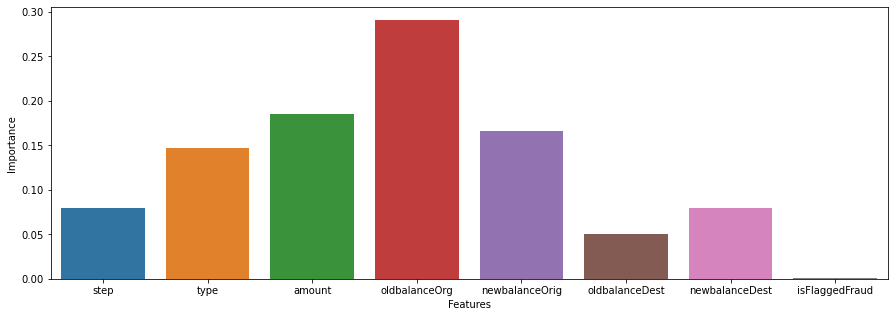

In [164]:
#Feature Importance by using the feature_importance

rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(data,Y)
importance = rfc.feature_importances_
final_df = pd.DataFrame({'Features':data.columns,'Importance':importance})

plt.figure(figsize=(15,5))
sns.barplot('Features','Importance',data=final_df)

Again confirming with the above grapgh. Every feature is having significance in the model. So used every variable to build the model.

# 4 DEMONSTRATING THE PERFORMANCE OF THE MDOEL

The model performance can be demonstrate by using the metrics:
1 Crossvalidation score
2 Accuracy
3 Confusion Matrix

The use of crossvalidation score is to know the multiple accuracies of the model. The model is performing good i.e The average accuracy of the model is 0.96

# 5 KEY FACTORS TO PREDICT THE FRAUDULENT CUSTOMER

The below features are the main key factos to predict the fradulent customer

1 Unusual Transcation
2 Mode of Transcation
3 OldbalanceOrg
4 newbalanceDest
5 Amount

# 6 DOES THE KEY FACTOR MAKE SENSE ? YES

1 Unsual Transaction:
The unusual has the details of the data how much they tranfered to receiver and has the unusual patterns of the data i.e Amount and mode the they used.

2 Mode of transcation:
By the mode of transaction we can able to get to know the fraud transaction by customer (Unusal mode)

3 OldbalanceOrg and NewbalanceDest:
The old balance will let us know whether the amount is debited from account or not and newbalance in the receiver account will tell us know whether the transaction is really happend between the (sender and receiver) or not.

4 Amount:
Amount will tell us how much has in the account before the tranction.

# 7 PREVENTION (UPDATE IN INFRASTRUCTURE)

Prevention :
Responsibility for protection forces on banking and componded by mounting National and International Regulation&Complaince mandates.

Payment Risk Management System should run quickly inorder to find the fraud transaction in a real time before the sophisticated thefts or fraud transaction complete. Perform some secs analysis(Example : Our model) on anonymous transaction or unusual transaction as sets typical and non-typical profile identity and addresses the new thefts immediatly

# 8 DETERMINING THE IMPLEMENTATION

If a any fraud transaction happened by Malwares, Trojans, Account takeover, Indentity theft, credit abuse, Data breach). The Payment Risk Management System will run quickly on fraud transaction and address the new theft (Our model will helps to find the new thefts. It classifies whether the transaction is fraud or not).

A real time cross channel fraud manage solution with flexible approach to integrate with payments platform. A solution with rapid implementation which produces the result faster. One which levarage shared data is use to perform real time analysis as thefts evolved and facilitates easily defining implementations and new rules by Payment Risk Management System.